In [61]:
from numpy import random, array, pi
import matplotlib.pyplot as plt

In [68]:
def random_param_misc(N, Mtot_mu, Dc_mu):
    Mtot_rand = []
    Dc_rand = []
    for i in range(N):
        Mtot_rand.append(random.normal(loc=Mtot_mu, scale=Mtot_mu/3 - 1))
        Dc_rand.append(random.normal(loc=Dc_mu, scale=Dc_mu/3 - 10))
    
    Mtot_rand = [num if num >= 0 else 0 for num in Mtot_rand]
    Dc_rand = [num if num >= 0 else 0 for num in Dc_rand]
    return array(Mtot_rand), array(Dc_rand)

In [54]:
def compute_CR(fsig, fapl, fg, fQ):
    return (2.20e-8 * fsig * (g/0.31) * (Q/0.1)) / (pi * (fapl/pi)**2)

In [57]:
def compute_SIG(fMtot, frho, fdc, fdmin):
    return fMtot * pi / (6.9e-8 * frho * fdc**0.9 * fdmin**0.7)

In [58]:
def compute_DMIN(fMstar, frho, feta, fMplt):
    return max(2.07e4 * 1e-6 * (fMstar)**(10./3.) * frho**(-1) * (feta/0.5)**(1./2.) * (fMplt)**(-1./3.), 1.65e-6)

In [71]:
Mtot, Dc = random_param_misc(1000, 60, 125) # Mtot in Mmoon, Dc in km

# invariants (maybe?)
eta = 0.5
rho = 1500
Q = 0.1
g = 0.32

# Fix planetary and stellar params for now
Mstar = 7.5/100 # Msun
Lstar = Mstar**4 # Lsun
Mplt = 1 # Mj
apl = 50 # AU

dmin = compute_DMIN(Mstar, rho, eta, Mplt)
sig = compute_SIG(Mtot, rho, Dc, dmin)
cr = compute_CR(sig, apl, g, Q)

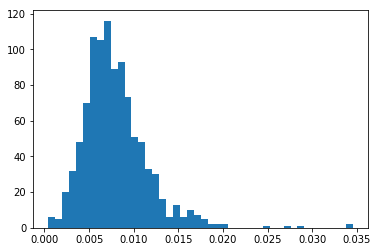

In [72]:
plt.figure(1)
plt.hist(cr, bins='auto')
plt.show()